In [72]:
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential , Model 
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout , BatchNormalization 
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import models , layers
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from sklearn.metrics import classification_report, confusion_matrix


import warnings
warnings.filterwarnings("ignore")

In [55]:
train_dir = '/kaggle/input/upmcfood101/images/train'  
test_dir = '/kaggle/input/upmcfood101/images/test'  

In [56]:
selected_classes = ['pancakes', 'falafel', 'pizza', 'hamburger','samosa',
                    'waffles','donuts', 'cheesecake', 'steak', 'ice_cream', 
                    'lasagna', 'onion_rings' ,'omelette', 'tacos', 'tiramisu']  

In [57]:
Batch_size =32

In [59]:
# Data augmentation and preprocessing
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest')

# No augmentation of the test data, just rescaling
test_datagen = ImageDataGenerator(rescale=1./255)


# applying the generator to training data with constant seed
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(224, 224),
                                                    batch_size=Batch_size,
                                                    class_mode="categorical",
                                                    classes=selected_classes)

# applying the generator to testing data with constant seed
test_generator = test_datagen.flow_from_directory(test_dir,
                                                  target_size=(224, 224),
                                                  batch_size=Batch_size,
                                                  class_mode="categorical",
                                                  classes=selected_classes)
# Print the class names detected by the generator
print("Classes found in the dataset:", train_generator.class_indices)

Found 10328 images belonging to 15 classes.
Found 3452 images belonging to 15 classes.
Classes found in the dataset: {'pancakes': 0, 'falafel': 1, 'pizza': 2, 'hamburger': 3, 'samosa': 4, 'waffles': 5, 'donuts': 6, 'cheesecake': 7, 'steak': 8, 'ice_cream': 9, 'lasagna': 10, 'onion_rings': 11, 'omelette': 12, 'tacos': 13, 'tiramisu': 14}


## EfficientNet-B0 model

In [63]:
# Load the EfficientNet-B0 model without the top layer
base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Unfreeze specific layers for fine-tuning
base_model.trainable = True
for layer in base_model.layers[:100]:  # Adjust the number based on your needs
    layer.trainable = False

# Recompile the model with a lower learning rate
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

early_stopping = EarlyStopping(
    monitor='val_loss',        # Metric to monitor
    patience=5,                # Number of epochs to wait before stopping
    restore_best_weights=True, # Restore the best weights after stopping
    mode='min'                 # 'min' for loss, 'max' for accuracy
)

# Train again
history = model.fit(
    train_generator,
    epochs=20,
    validation_data=test_generator,
    batch_size=Batch_size,
    callbacks=[early_stopping]
)


Epoch 1/20
323/323 ━━━━━━━━━━━━━━━━━━━━ 234s 541ms/step - accuracy: 0.2045 - loss: 2.5262 - val_accuracy: 0.5487 - val_loss: 1.5962
Epoch 2/20
323/323 ━━━━━━━━━━━━━━━━━━━━ 148s 450ms/step - accuracy: 0.5656 - loss: 1.5502 - val_accuracy: 0.6454 - val_loss: 1.1667
Epoch 3/20
323/323 ━━━━━━━━━━━━━━━━━━━━ 147s 447ms/step - accuracy: 0.6435 - loss: 1.1879 - val_accuracy: 0.6918 - val_loss: 1.0089
Epoch 4/20
323/323 ━━━━━━━━━━━━━━━━━━━━ 148s 448ms/step - accuracy: 0.6820 - loss: 1.0328 - val_accuracy: 0.7184 - val_loss: 0.9255
Epoch 5/20
323/323 ━━━━━━━━━━━━━━━━━━━━ 150s 456ms/step - accuracy: 0.7117 - loss: 0.9340 - val_accuracy: 0.7312 - val_loss: 0.8773
Epoch 6/20
323/323 ━━━━━━━━━━━━━━━━━━━━ 148s 448ms/step - accuracy: 0.7409 - loss: 0.8322 - val_accuracy: 0.7471 - val_loss: 0.8311
Epoch 7/20
323/323 ━━━━━━━━━━━━━━━━━━━━ 148s 449ms/step - accuracy: 0.7567 - loss: 0.7796 - val_accuracy: 0.7517 - val_loss: 0.8102
Epoch 8/20
323/323 ━━━━━━━━━━━━━━━━━━━━ 146s 444ms/step - accuracy: 0.7840 -

In [64]:
model.save('food101_EfficientNetB0_acc90_78.h5')

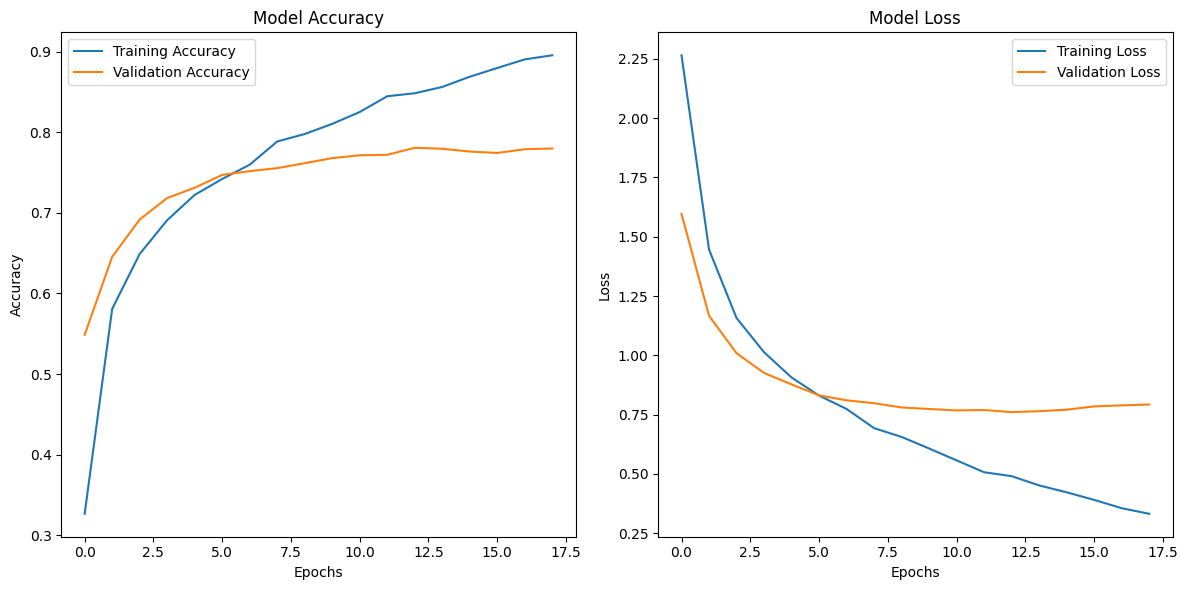

In [65]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


108/108 ━━━━━━━━━━━━━━━━━━━━ 13s 121ms/step


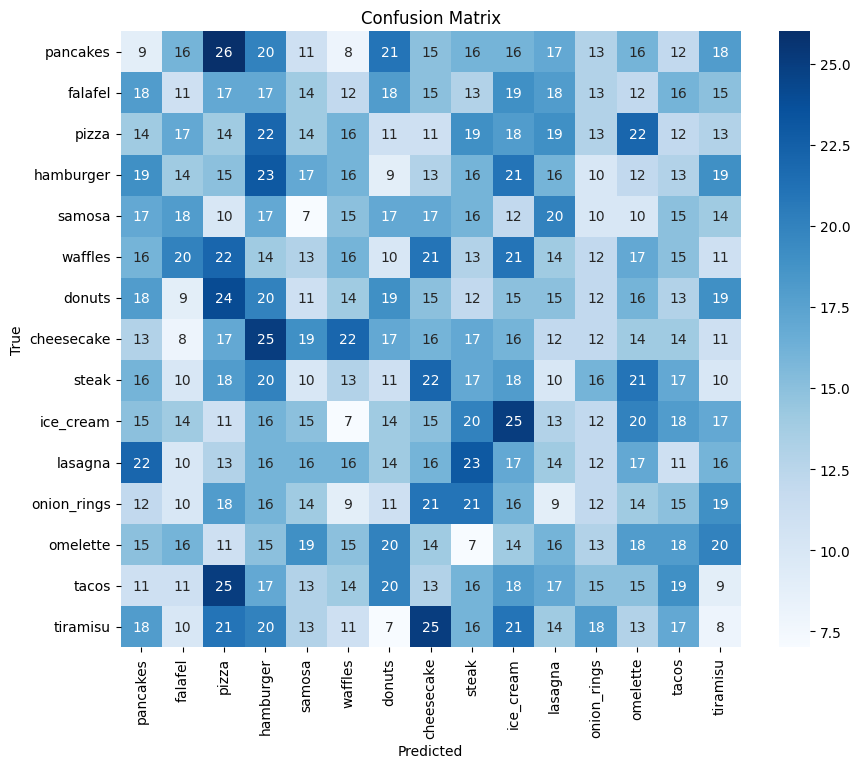

In [75]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Get true labels from the validation set
y_true = test_generator.classes

# Get predictions from the model
steps = int(np.ceil(test_generator.samples / test_generator.batch_size))
y_pred = model.predict(test_generator, steps=steps, verbose=1)
y_pred = np.argmax(y_pred, axis=1)


# Ensure predictions match the number of true labels
y_pred = y_pred[:len(y_true)]

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix using seaborn heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=test_generator.class_indices.keys(), 
            yticklabels=test_generator.class_indices.keys())
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()
